In [12]:
import os
import sys

import cv2
import ft_model
import matplotlib.pyplot as plt
import pandas as pd
import silence_tensorflow
import tensorflow as tf
import tqdm
import matplotlib as mpl
import matplotlib.font_manager as fm

sys.path.append("../")
import img_preprocess
import settings

# setting tensorflow
silence_tensorflow.silence_tensorflow()
tf.random.set_seed(42)

plt.rc('font', family='Malgun Gothic')

mpl.rcParams['axes.unicode_minus'] = False

In [13]:
def model_iu(img, model, only_proba=True, threshold=0.5):
    img = img_preprocess.cnn_preprocess_img(img, settings.IMG_SIZE, predict=True)
    proba = float(model.predict(img)[0][0])

    if only_proba is False:
        if proba >= threshold:
            return proba, "OK"
        else:
            return proba, "NG"

    return proba


def predict_dir(dir_path, model):
    probas = []

    img_names = os.listdir(dir_path)

    for img_name in img_names:
        img_path = os.path.join(dir_path, img_name)
        img = cv2.imread(img_path)

        proba = model_iu(img, model)
        probas.append(proba)

        print(proba)

    return probas


def low_score(dir_path, model):
    low_score = []

    img_names = os.listdir(dir_path)

    for img_name in img_names:
        img_path = os.path.join(dir_path, img_name)
        img = cv2.imread(img_path)

        score = model_iu(img, model)

        if score < 0.5:
            low_score.append(img_name)

        print(score)

    return low_score

In [14]:
model = ft_model.Model(settings.IMG_SHAPE, False, False)
model.load_weights("../cnn_model/weight/base_weight/20221129-221745/50")

1/1 [==============================] - 0s 222ms/step
9.594784933142364e-05
1/1 [==============================] - 0s 251ms/step
3.563693340424834e-08
1/1 [==============================] - 0s 247ms/step
0.003354559186846018
1/1 [==============================] - 0s 328ms/step
0.0049964068457484245
1/1 [==============================] - 0s 201ms/step
0.001134066958911717
1/1 [==============================] - 0s 244ms/step
0.00018030044157058
1/1 [==============================] - 0s 235ms/step
0.7371261715888977
1/1 [==============================] - 0s 241ms/step
0.002863077213987708
1/1 [==============================] - 0s 246ms/step
8.047251753851015e-08
1/1 [==============================] - 0s 218ms/step
5.191427408135496e-05
1/1 [==============================] - 0s 212ms/step
0.000834659906104207
1/1 [==============================] - 0s 226ms/step
0.00015022065781522542
1/1 [==============================] - 0s 209ms/step
0.0004345551133155823
1/1 [============================

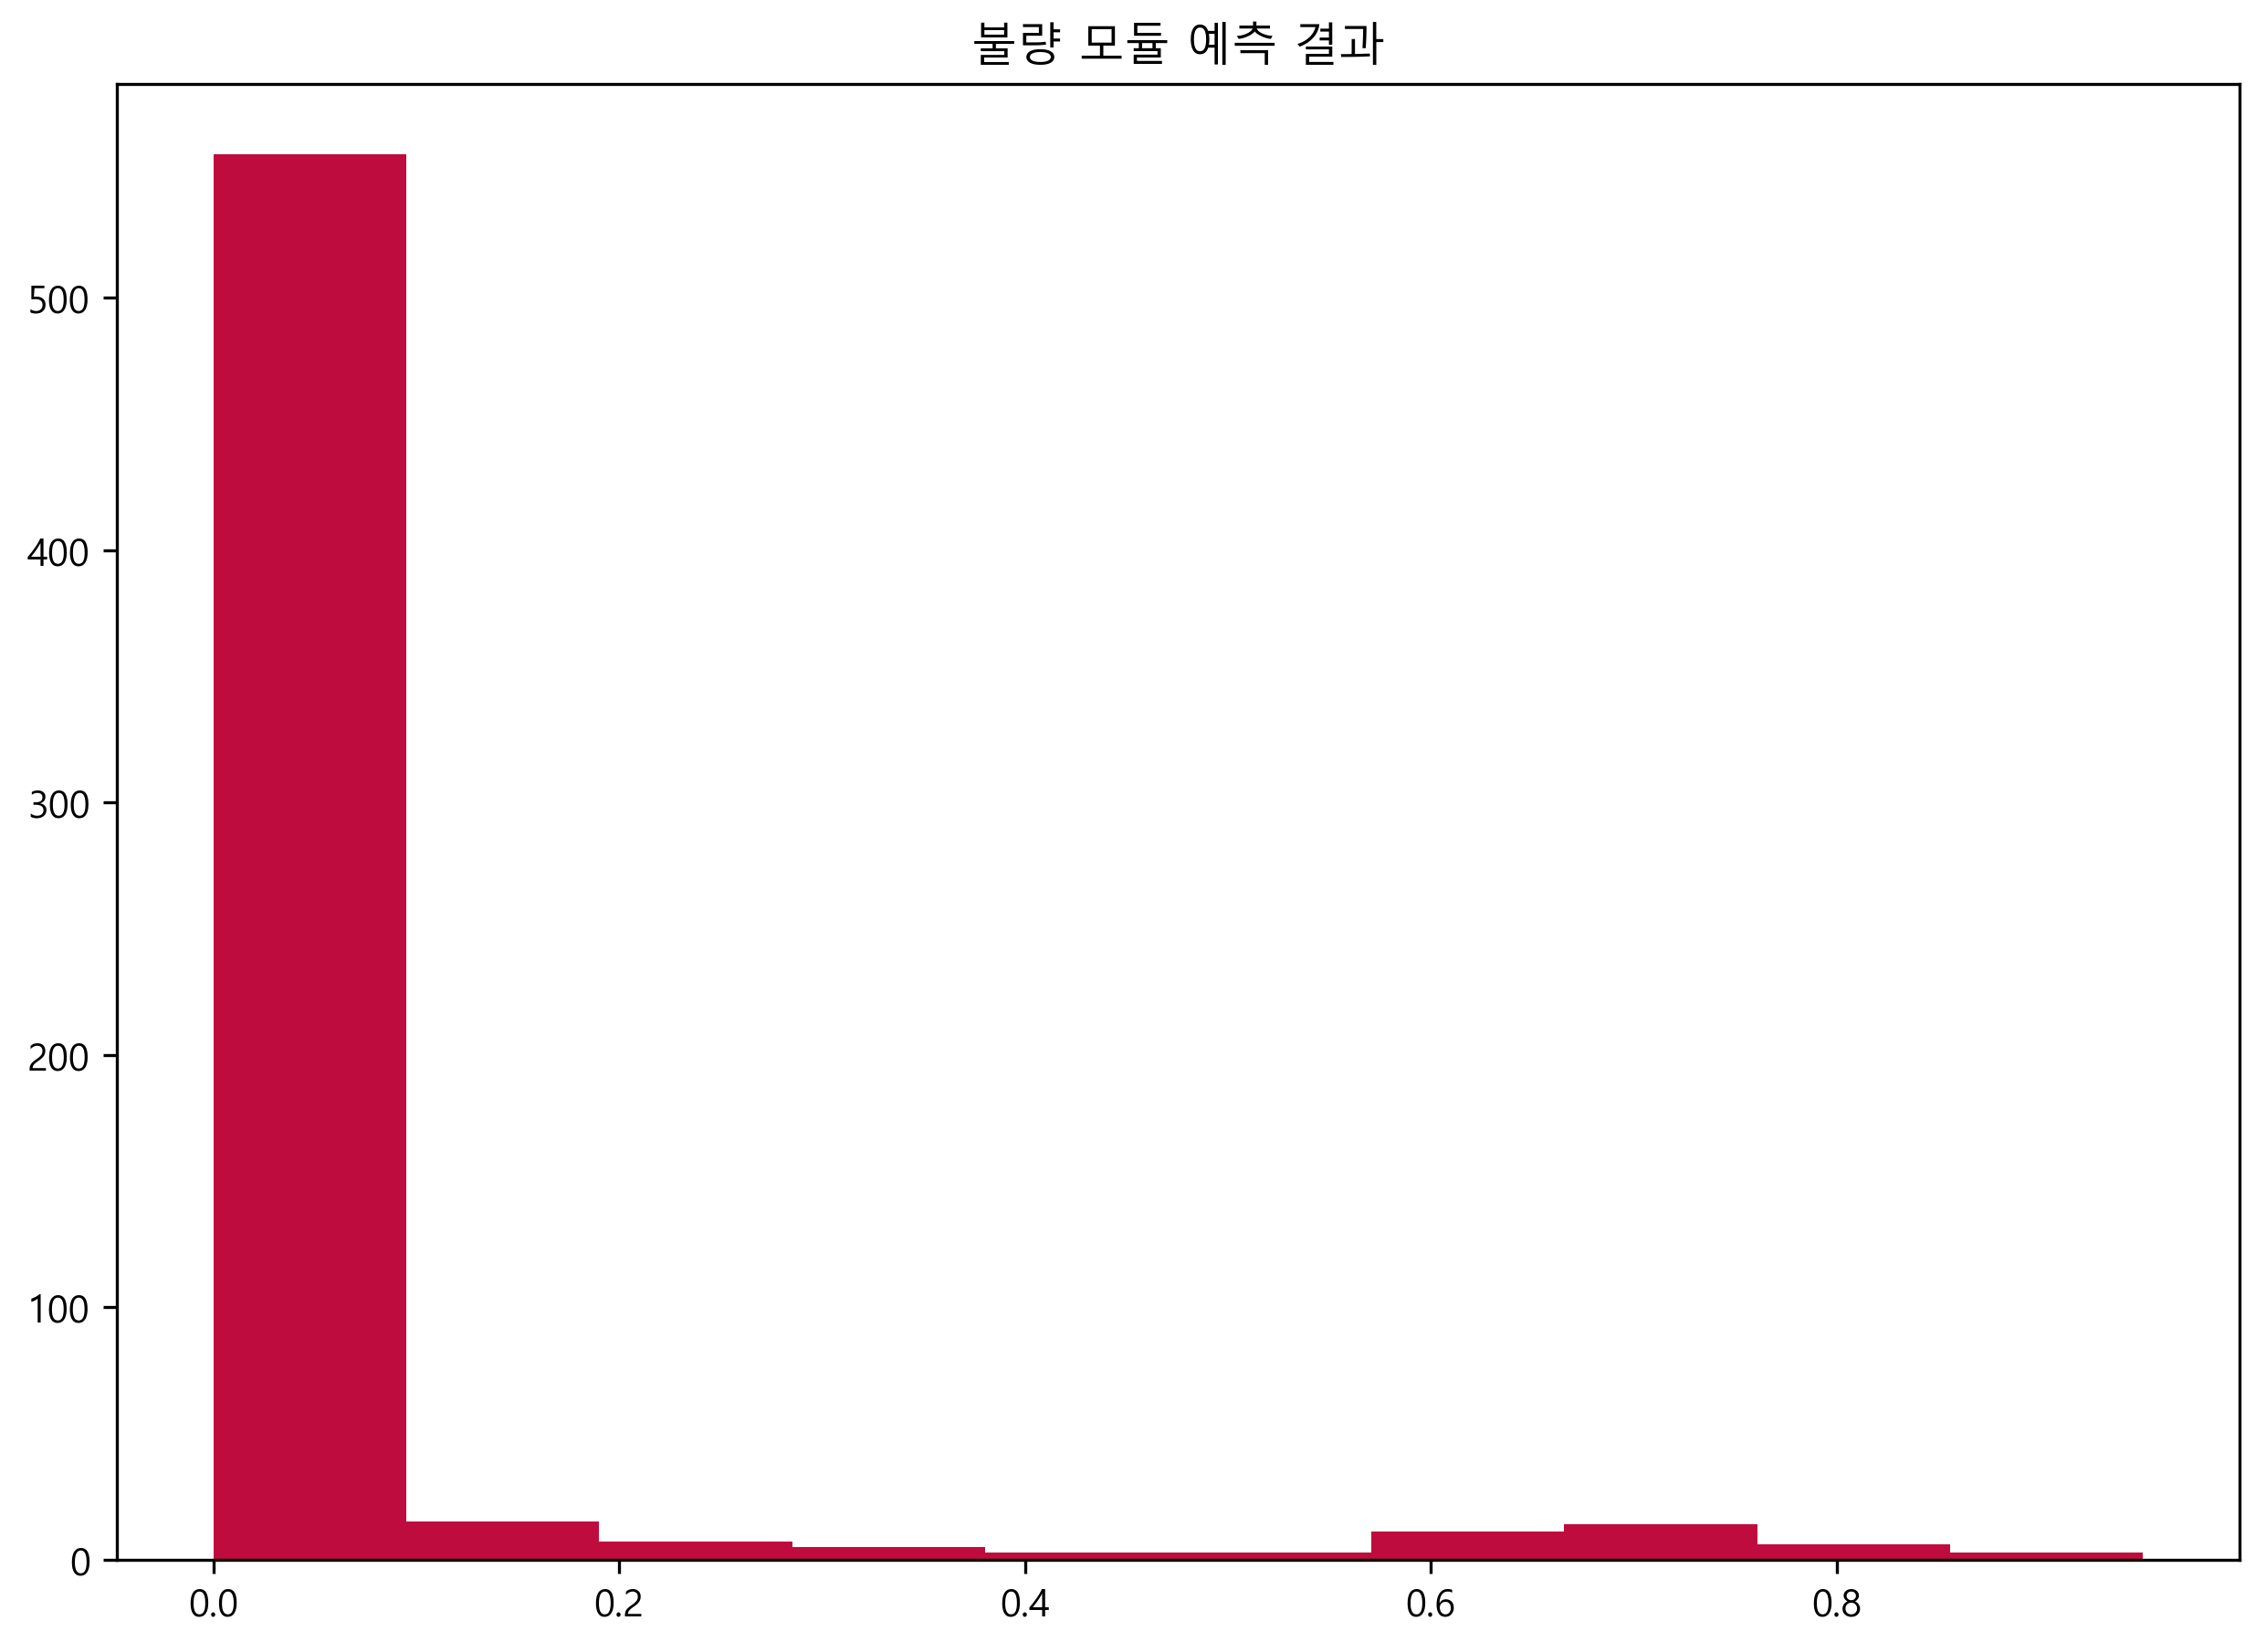

In [18]:
ng_scores = predict_dir("../image/module/true_ng", model)

plt.figure(figsize=(10, 7), dpi=300)
plt.hist(ng_scores, color="#BF0C3F")
plt.title("불량 모듈 예측 결과")
plt.show()

1/1 [==============================] - 0s 278ms/step
0.8150493502616882
1/1 [==============================] - 0s 283ms/step
0.7777212262153625
1/1 [==============================] - 0s 278ms/step
0.7665868401527405
1/1 [==============================] - 0s 264ms/step
0.7088986039161682
1/1 [==============================] - 0s 256ms/step
0.8364439606666565
1/1 [==============================] - 0s 280ms/step
0.89472895860672
1/1 [==============================] - 0s 295ms/step
0.7443403005599976
1/1 [==============================] - 0s 284ms/step
0.7607025504112244
1/1 [==============================] - 0s 311ms/step
0.7685655355453491
1/1 [==============================] - 0s 298ms/step
0.7929263114929199
1/1 [==============================] - 0s 251ms/step
0.758886992931366
1/1 [==============================] - 0s 292ms/step
0.7799346446990967
1/1 [==============================] - 0s 283ms/step
0.7591083645820618
1/1 [==============================] - 0s 252ms/step
0.761026561260

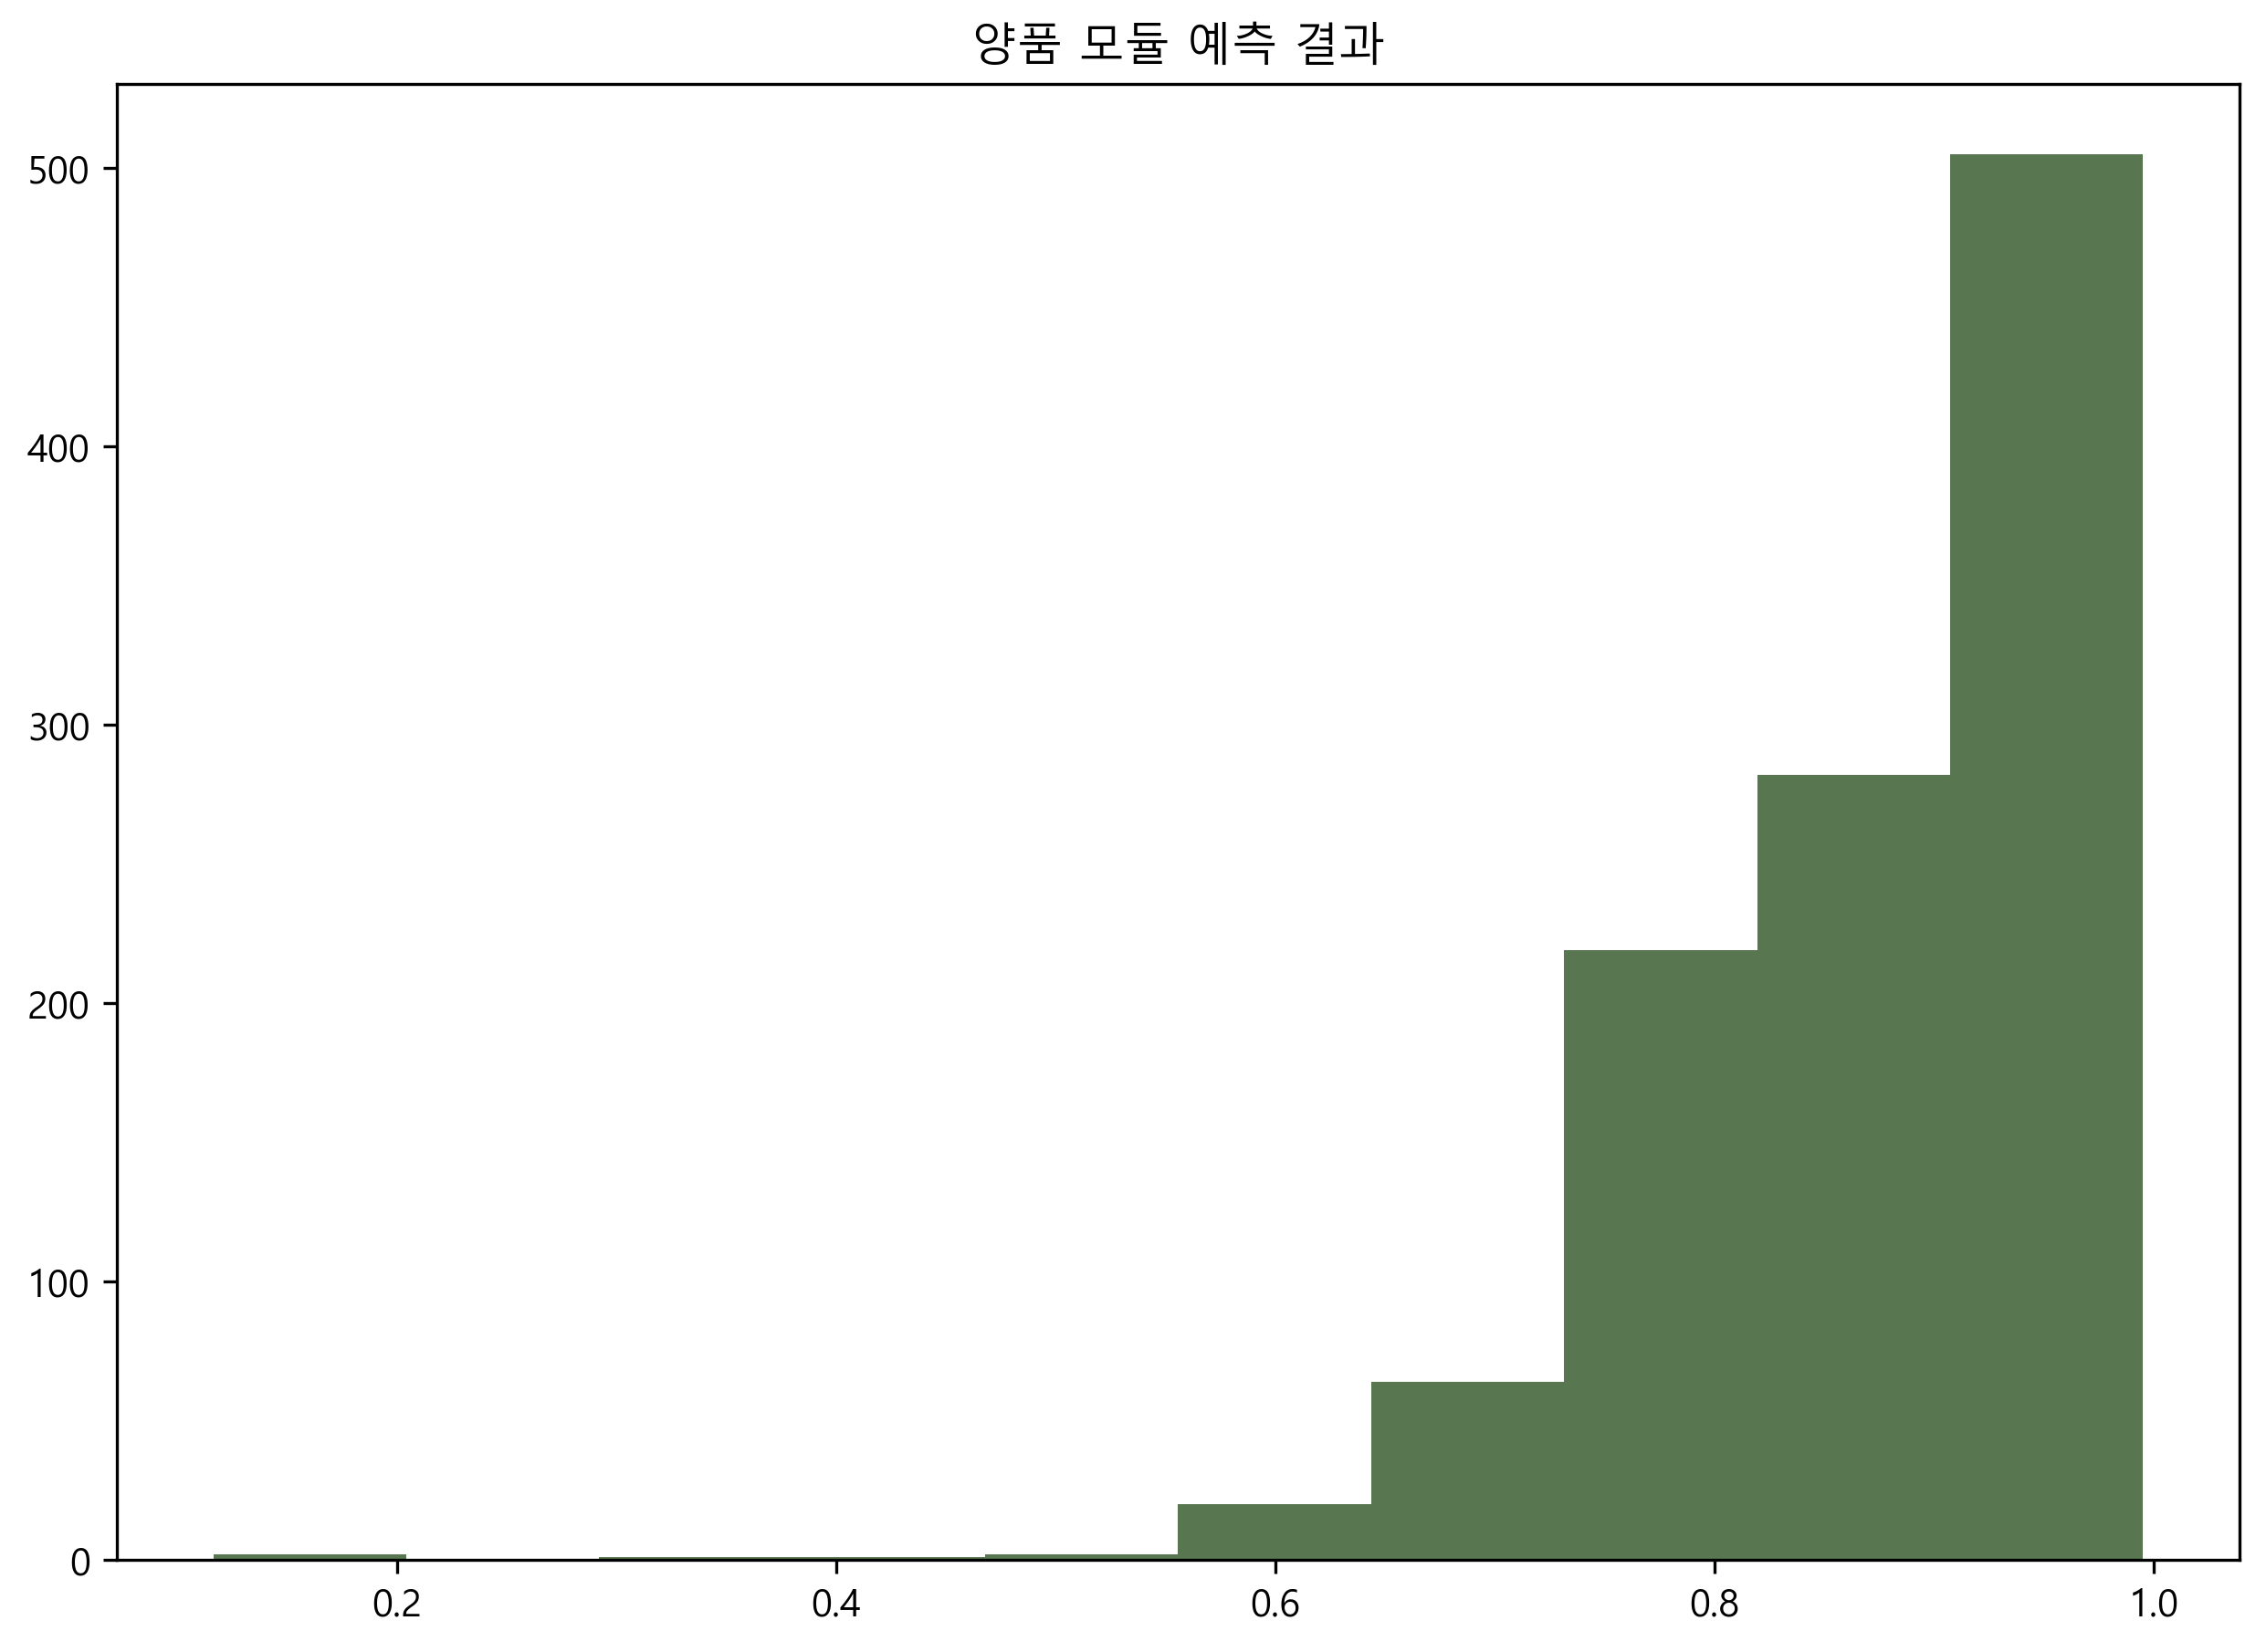

In [19]:
ok_scores = predict_dir("../image/module/true_ok", model)

plt.figure(figsize=(10, 7), dpi=300)
plt.hist(ok_scores, color="#587650")
plt.title("양품 모듈 예측 결과")
plt.show()

1/1 [==============================] - 0s 367ms/step
0.7313726544380188
1/1 [==============================] - 0s 394ms/step
0.7399705648422241
1/1 [==============================] - 0s 385ms/step
0.852938175201416
1/1 [==============================] - 0s 413ms/step
0.7478069067001343
1/1 [==============================] - 0s 375ms/step
0.7530261278152466
1/1 [==============================] - 0s 370ms/step
0.7481799125671387
1/1 [==============================] - 0s 389ms/step
0.7457147836685181
1/1 [==============================] - 0s 380ms/step
0.6568471193313599
1/1 [==============================] - 0s 382ms/step
0.8154023289680481
1/1 [==============================] - 0s 383ms/step
0.6800835132598877
1/1 [==============================] - 0s 397ms/step
0.7314189672470093
1/1 [==============================] - 0s 415ms/step
0.6770452857017517
1/1 [==============================] - 0s 382ms/step
0.8393425345420837
1/1 [==============================] - 0s 386ms/step
0.6623491048

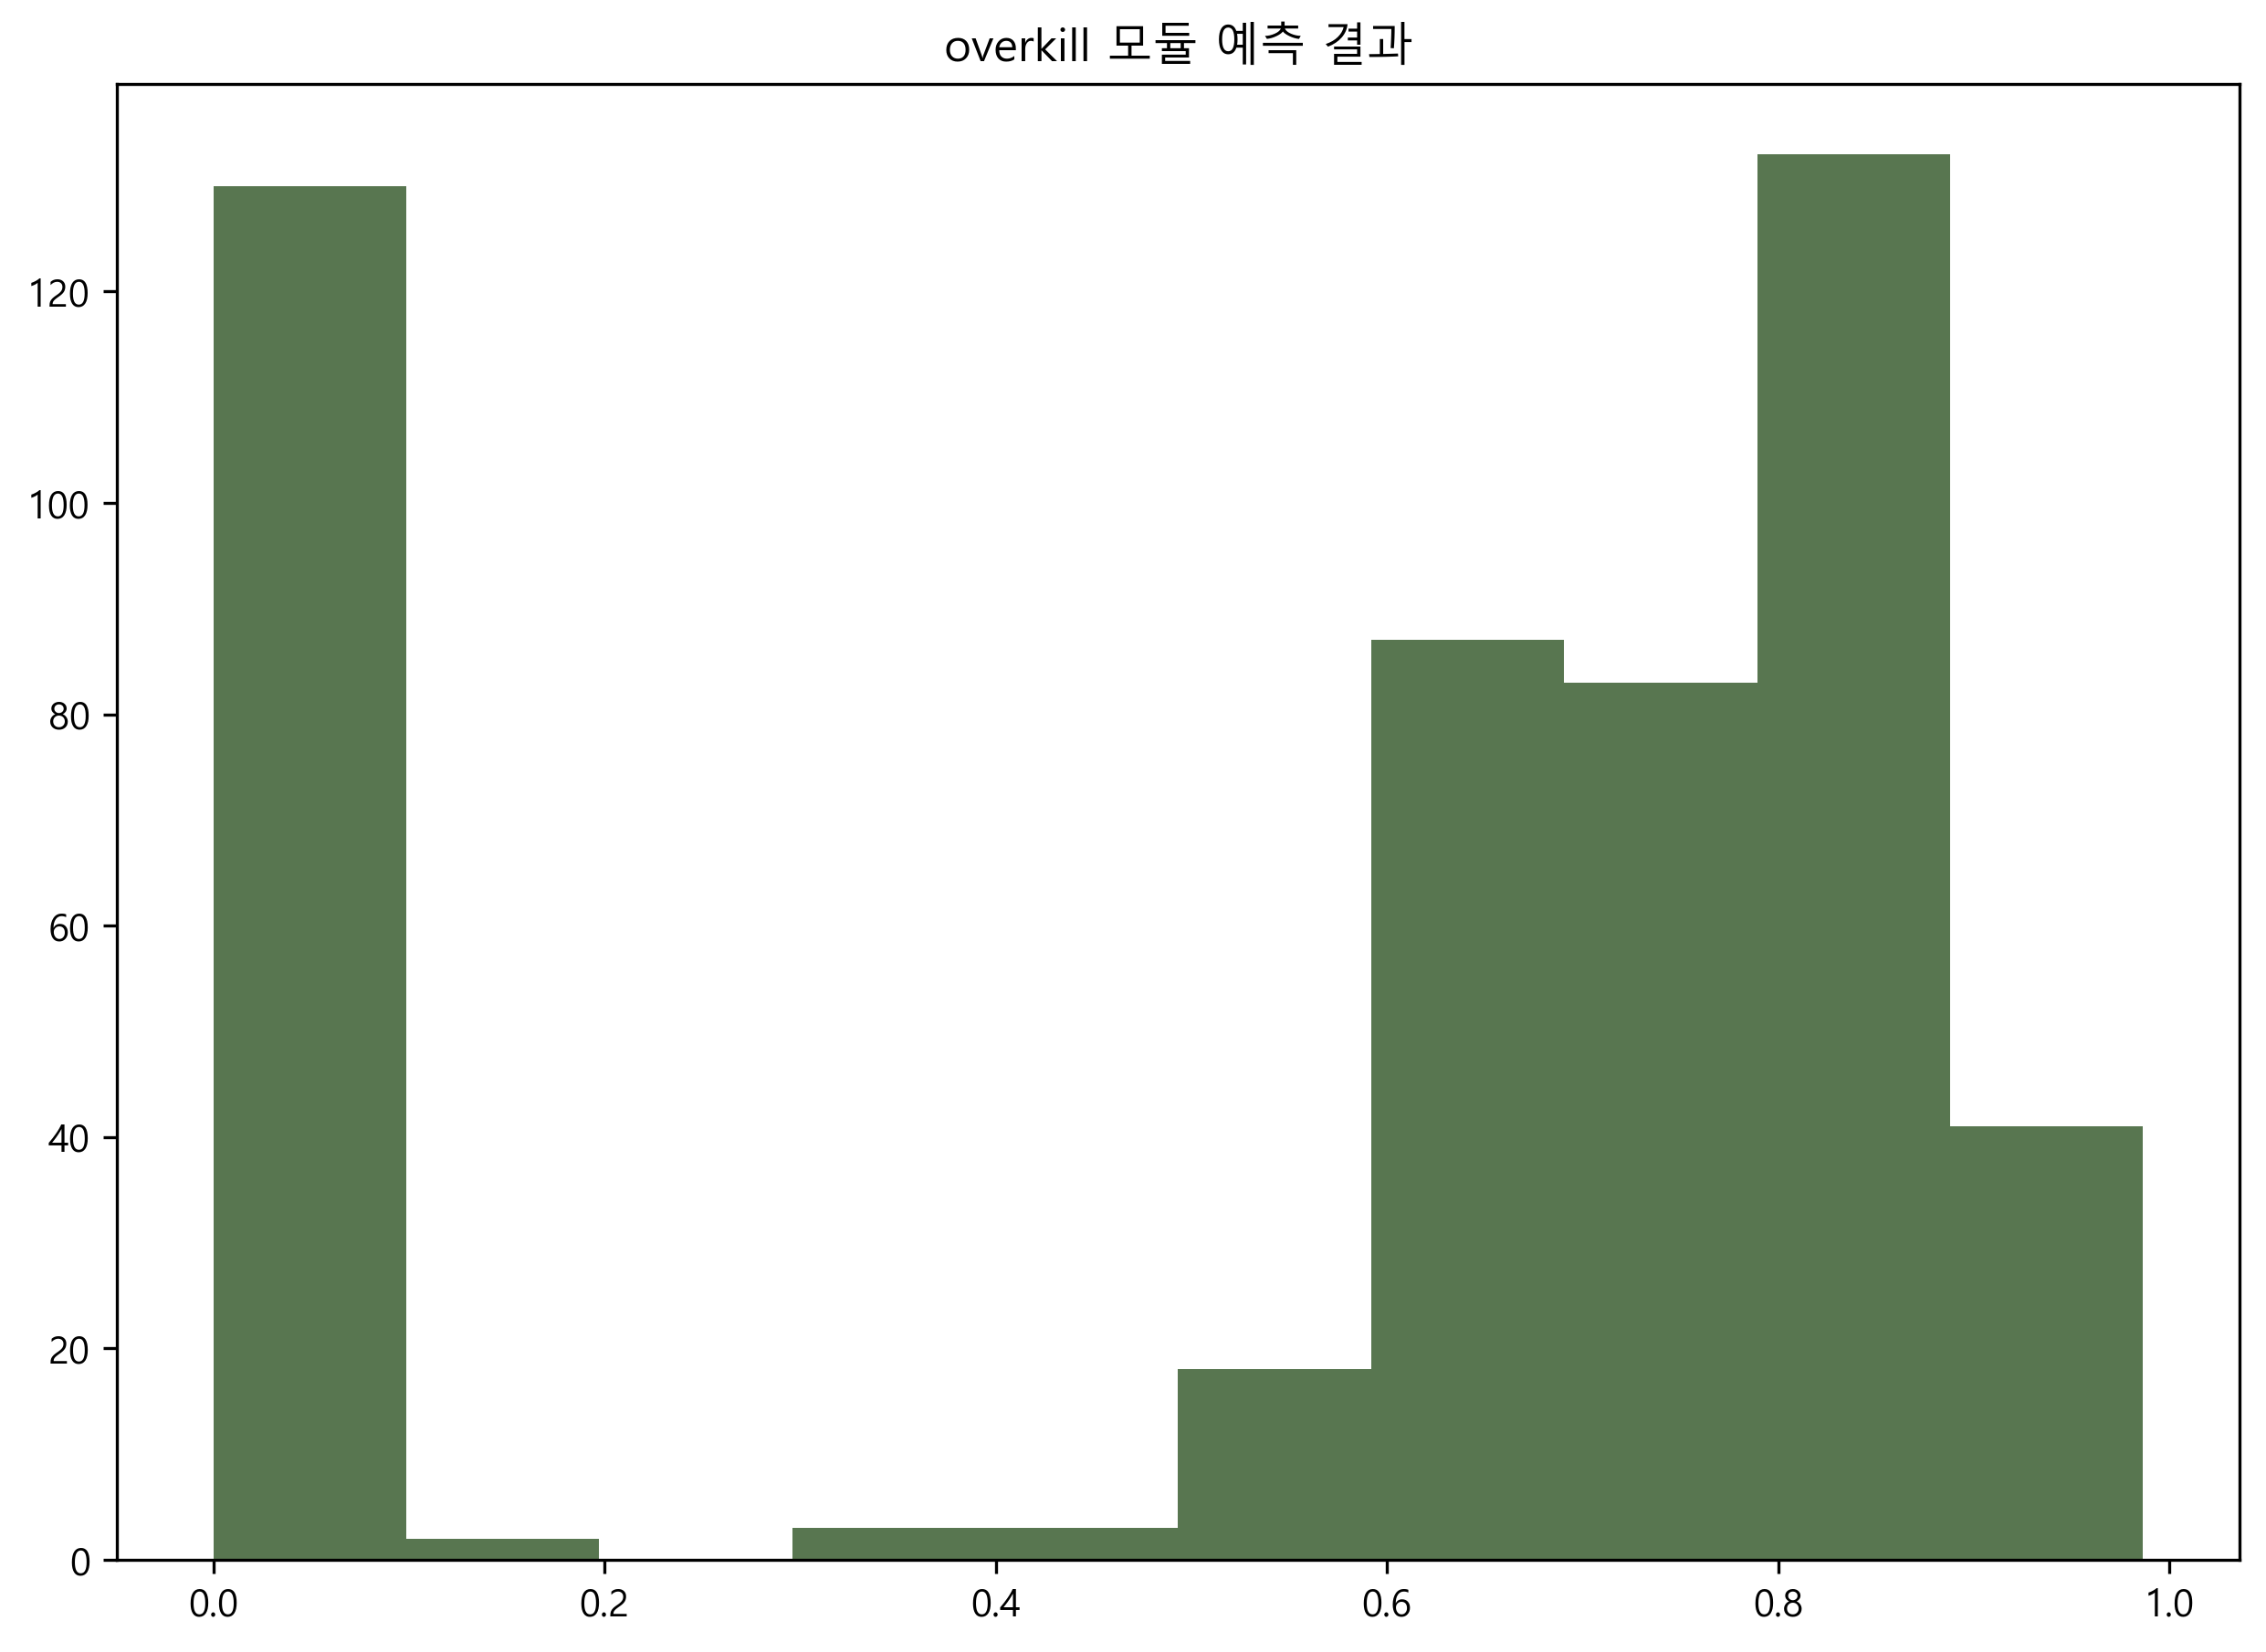

In [22]:
ovk_scores = predict_dir("../image/module/overkill/", model)

plt.figure(figsize=(10, 7), dpi=300)
plt.hist(ovk_scores, color="#587650")
plt.title("overkill 모듈 예측 결과")
plt.show()